In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
diamonds_df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

# Data preprocessing
le = LabelEncoder()
diamonds_df['cut'] = le.fit_transform(diamonds_df['cut'])
diamonds_df['color'] = le.fit_transform(diamonds_df['color'])
diamonds_df['clarity'] = le.fit_transform(diamonds_df['clarity'])

# Split data into features (X) and target variable (y)
X = diamonds_df.drop('price', axis=1)
y = diamonds_df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1064.7354214950565


In [11]:
diamonds_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

/tmp/ipykernel_32/505901547.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = diamonds_df.corr()


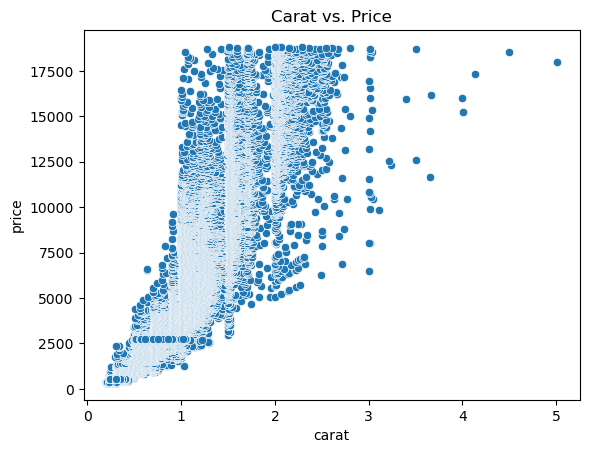

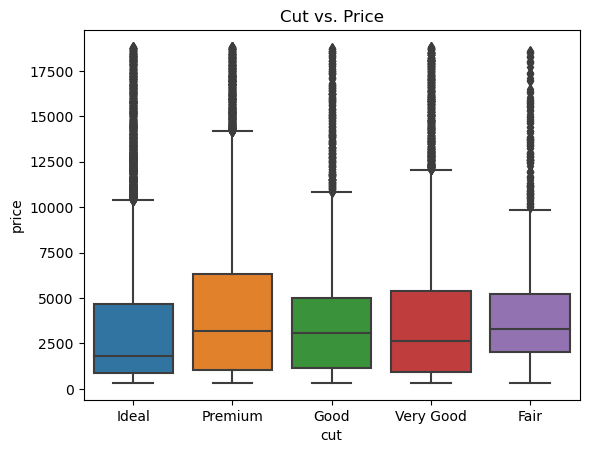

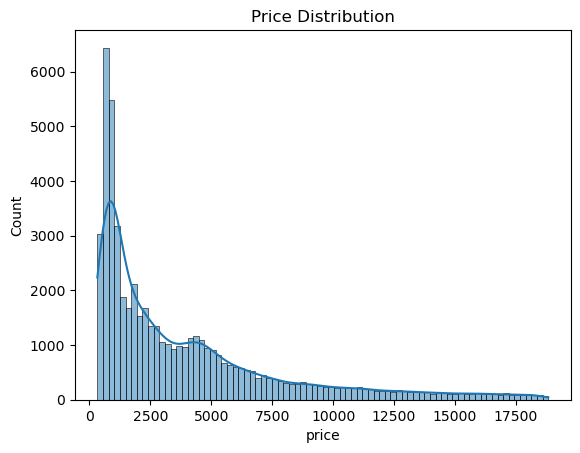

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64


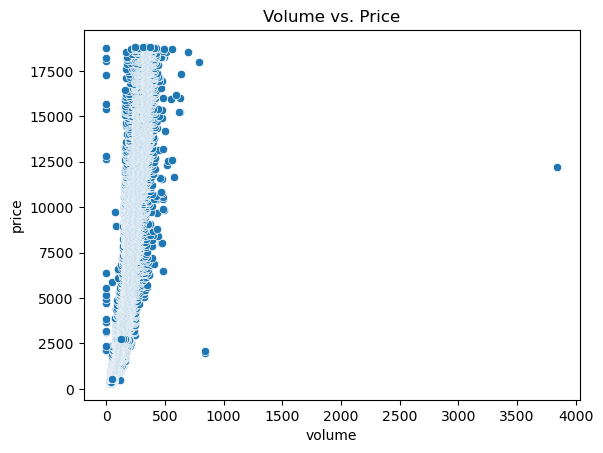

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
diamonds_df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

# Descriptive statistics
print(diamonds_df.describe())

# Correlation analysis
corr_matrix = diamonds_df.corr()
print(corr_matrix)

# Scatter plot: Carat vs. Price
sns.scatterplot(x='carat', y='price', data=diamonds_df)
plt.title('Carat vs. Price')
plt.show()

# Box plot: Cut vs. Price
sns.boxplot(x='cut', y='price', data=diamonds_df)
plt.title('Cut vs. Price')
plt.show()

# Histogram: Price distribution
sns.histplot(diamonds_df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Grouping and aggregation: Average price by cut
avg_price_by_cut = diamonds_df.groupby('cut')['price'].mean()
print(avg_price_by_cut)

# Feature engineering: Calculate volume
diamonds_df['volume'] = diamonds_df['x'] * diamonds_df['y'] * diamonds_df['z']

# Scatter plot: Volume vs. Price
sns.scatterplot(x='volume', y='price', data=diamonds_df)
plt.title('Volume vs. Price')
plt.show()


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables
diamonds_df['cut_encoded'] = le.fit_transform(diamonds_df['cut'])
diamonds_df['color_encoded'] = le.fit_transform(diamonds_df['color'])
diamonds_df['clarity_encoded'] = le.fit_transform(diamonds_df['clarity'])

# Print the updated dataframe
print(diamonds_df.head())
print(diamonds_df.tail())
print(diamonds_df.head(3))
print(diamonds_df.tail(-2))

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z     volume  cut_encoded  color_encoded  clarity_encoded  
0  2.43  38.202030            2              1                3  
1  2.31  34.505856            3              1                2  
2  2.31  38.076885            1              1                4  
3  2.63  46.724580            3              5                5  
4  2.75  51.917250            1              6                3  
       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D  

In [7]:

# Define the enumeration mapping
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Apply enumeration mapping
diamonds_df['cut_enum'] = diamonds_df['cut'].map(cut_mapping)
diamonds_df['color_enum'] = diamonds_df['color'].map(color_mapping)
diamonds_df['clarity_enum'] = diamonds_df['clarity'].map(clarity_mapping)

# Print the updated dataframe
print(diamonds_df.head())


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z     volume  cut_encoded  color_encoded  clarity_encoded  cut_enum  \
0  2.43  38.202030            2              1                3         4   
1  2.31  34.505856            3              1                2         3   
2  2.31  38.076885            1              1                4         1   
3  2.63  46.724580            3              5                5         3   
4  2.75  51.917250            1              6                3         1   

   color_enum  clarity_enum  
0           5             

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset


# Select the features and target variable
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
target = 'price'

X = diamonds_df[features]
y = diamonds_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (Coefficient of Determination):', r2)


Mean Squared Error (MSE): 2242178.9040856035
Root Mean Squared Error (RMSE): 1497.3906985438382
R-squared (Coefficient of Determination): 0.8589542625888938


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming you have X (feature variables) and y (target variable) defined

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regression model
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Without Regularization - R-squared Score: {r2*100}")


Without Regularization - R-squared Score: 99.99656752202948
